In [17]:
pip install  pandas matplotlib numpy seaborn statsmodels


  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.5 MB 349.5 kB/s eta 0:02:06
   ---------------------------------------- 0.5/44.5 MB 349.5 kB/s eta 0:02:06
   -------------

In [2]:
import pandas as pd
def load_data():
    return pd.read_csv('../data/daily_activity.csv', index_col='Date', parse_dates=True)

In [3]:
df= load_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1316 entries, 2020-12-07 to 2024-08-21
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Move Minutes count            1117 non-null   float64
 1   Calories (kcal)               1316 non-null   float64
 2   Distance (m)                  1119 non-null   float64
 3   Heart Points                  1105 non-null   float64
 4   Heart Minutes                 1105 non-null   float64
 5   Low latitude (deg)            17 non-null     float64
 6   Low longitude (deg)           17 non-null     float64
 7   High latitude (deg)           17 non-null     float64
 8   High longitude (deg)          17 non-null     float64
 9   Average speed (m/s)           1119 non-null   float64
 10  Max speed (m/s)               1119 non-null   float64
 11  Min speed (m/s)               1119 non-null   float64
 12  Step count                    1119 non-null 

In [5]:
df['Month Name'] = df.index.month_name()
df['Day Name'] = df.index.day_name()
df['Year'] = df.index.year

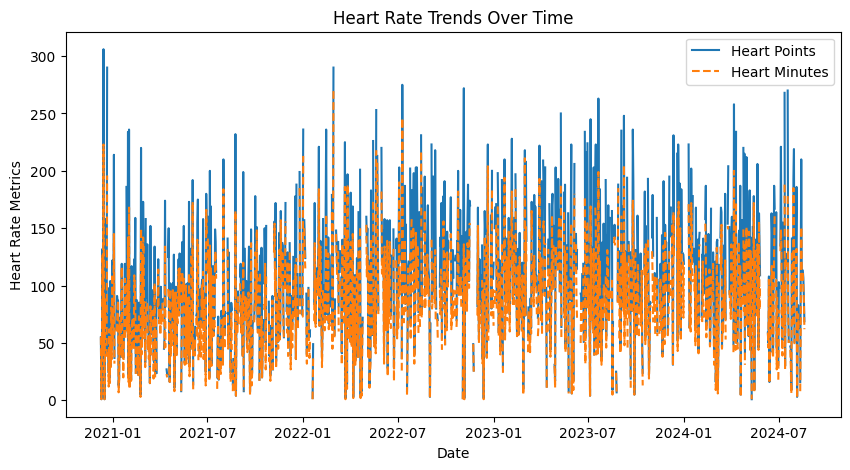

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has columns 'Time', 'Heart Points', and 'Heart Minutes'
# Example of a simple time series plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Heart Points'], label='Heart Points')
plt.plot(df.index, df['Heart Minutes'], label='Heart Minutes', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Heart Rate Metrics')
plt.title('Heart Rate Trends Over Time')
plt.legend()
plt.show()


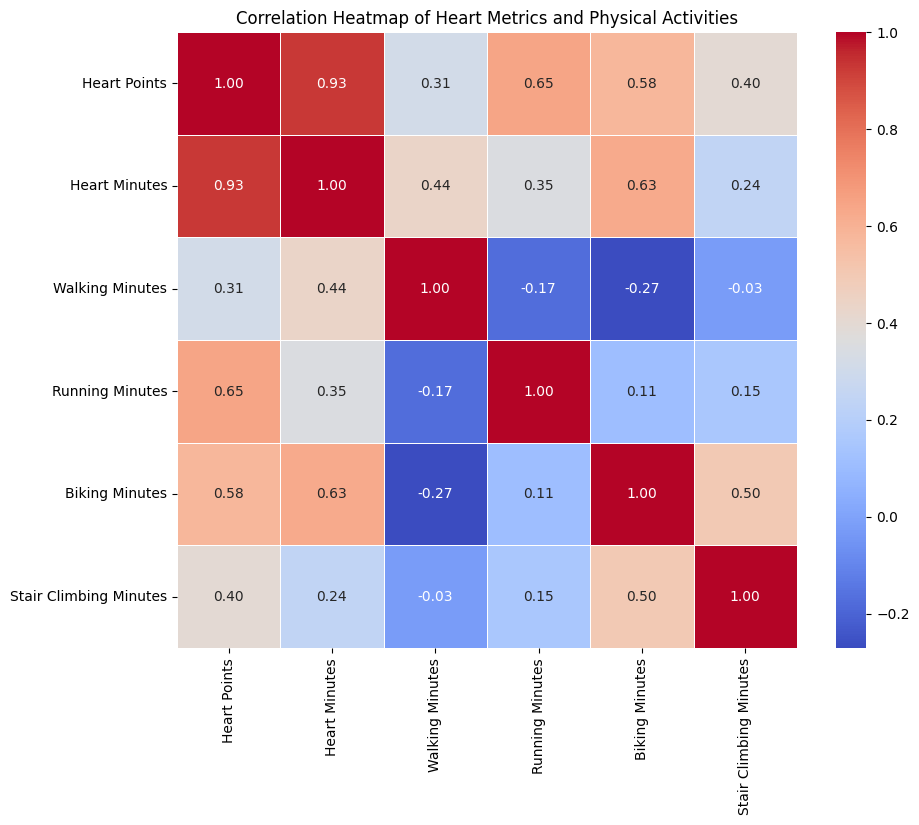

In [7]:
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame with the dataset
# Extract relevant columns
heart_points = df['Heart Points']
heart_minutes = df['Heart Minutes']

# Convert activity durations from milliseconds to minutes
walking_minutes = df['Walking duration (ms)'] / 60000
running_minutes = df['Running duration (ms)'] / 60000
biking_minutes = df['Biking duration (ms)'] / 60000
stair_climbing_minutes = df['Stair climbing duration (ms)'] / 60000

# Create a DataFrame with heart data and activities
data = pd.DataFrame({
    'Heart Points': heart_points,
    'Heart Minutes': heart_minutes,
    'Walking Minutes': walking_minutes,
    'Running Minutes': running_minutes,
    'Biking Minutes': biking_minutes,
    'Stair Climbing Minutes': stair_climbing_minutes
})

# Calculate correlation matrix
correlation_matrix = data.corr()

# Draw the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Heart Metrics and Physical Activities')
plt.show()



Interpretation:

Running Minutes and Heart Points have a relatively strong positive correlation (0.65). This suggests that as running duration increases, heart points also tend to increase.

Biking Minutes and Heart Minutes show a strong positive correlation (0.63), indicating that biking duration is positively associated with heart minutes.

Walking Minutes and Heart Minutes have a moderate positive correlation (0.44), implying a reasonable connection between walking duration and heart minutes.

Stair Climbing Minutes and Heart Metrics exhibit weaker correlations (0.40 with Heart Points and 0.24 with Heart Minutes), indicating a less pronounced relationship between stair climbing and heart metrics.

These correlations suggest that different activities impact heart rate metrics differently, with more vigorous activities like running and biking having a stronger relationship with heart rate metrics compared to walking or stair climbing.

Moderate Activities: For activities that are moderately intense,  you earn 1 Heart Point for every minute of activity in Google fit.
Vigorous Activities: For more intense activities, such as running or cycling, you earn 2 Heart Points for every minute of activity in Google Fit.

## Trend Analysys using Moving Average : Heart Point and Heart Metrics

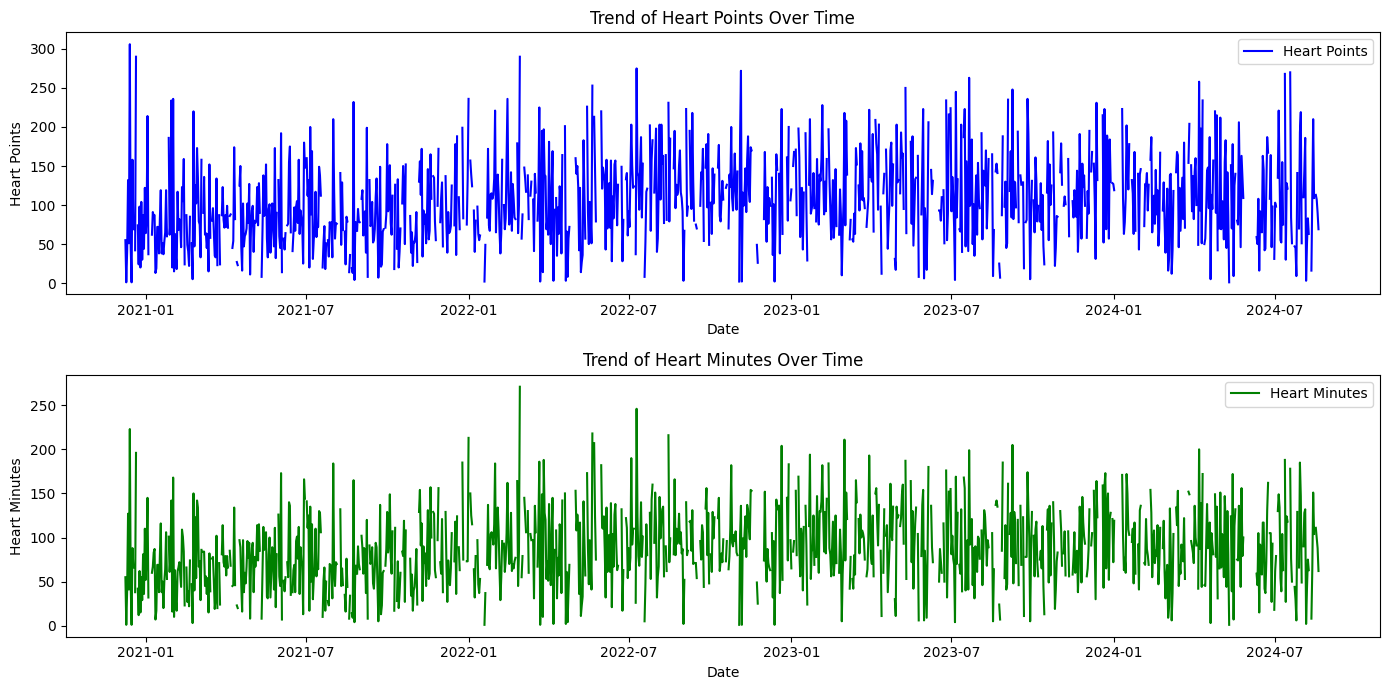

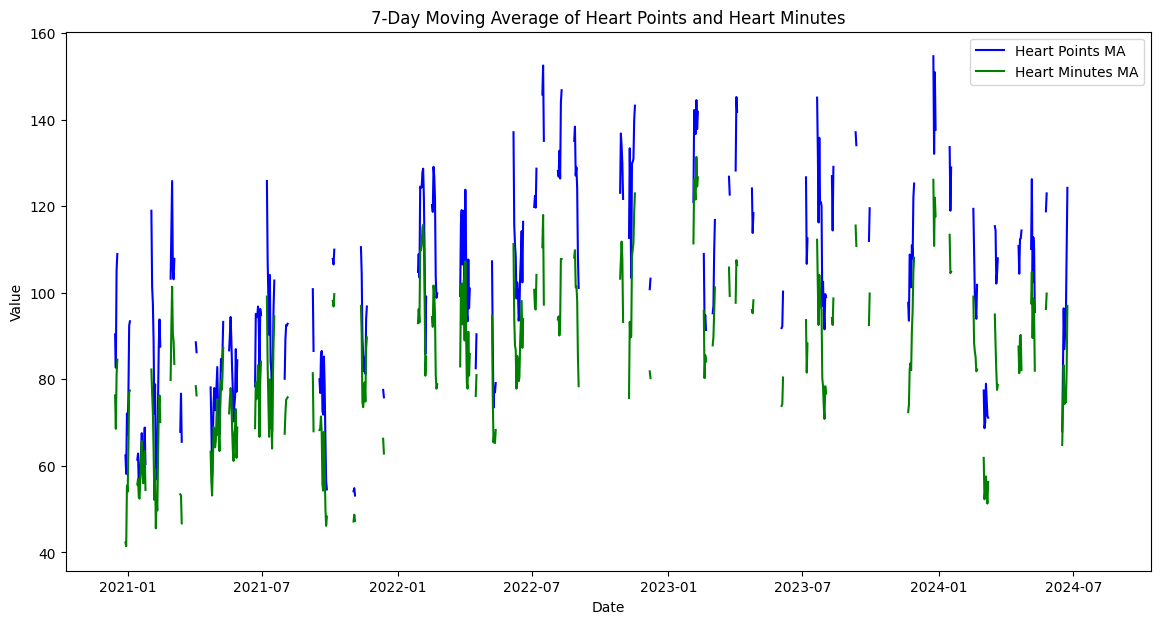

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the dataset, including a time or date column
# Let's create some dummy time index
# df['Date'] = pd.date_range(start='1/1/2023', periods=len(df), freq='D')

# Plot the trends
plt.figure(figsize=(14, 7))

# Line plot for Heart Points
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Heart Points'], label='Heart Points', color='blue')
plt.title('Trend of Heart Points Over Time')
plt.xlabel('Date')
plt.ylabel('Heart Points')
plt.legend()

# Line plot for Heart Minutes
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Heart Minutes'], label='Heart Minutes', color='green')
plt.title('Trend of Heart Minutes Over Time')
plt.xlabel('Date')
plt.ylabel('Heart Minutes')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate Moving Averages to smooth the trend
df['Heart Points MA'] = df['Heart Points'].rolling(window=7).mean()
df['Heart Minutes MA'] = df['Heart Minutes'].rolling(window=7).mean()

# Plot the Moving Averages
plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Heart Points MA'], label='Heart Points MA', color='blue')
plt.plot(df.index, df['Heart Minutes MA'], label='Heart Minutes MA', color='green')
plt.title('7-Day Moving Average of Heart Points and Heart Minutes')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Interpretations:

Increased Activity in Early Period: The early part of the data (2021-2022) shows an increasing trend, which could indicate a period of heightened focus on fitness or health activities.

Stabilization and Maintenance: The middle period (2022-2023) suggests that the user reached a level of consistent physical activity, maintaining a balance without major fluctuations.

Decline in Recent Activity: The slight downward trend in 2023-2024 may suggest a reduction in physical activity, possibly due to changes in lifestyle, external factors, or declining motivation.

C:\Users\HP\AppData\Local\Temp\ipykernel_28192\201503497.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_period['Heart Points MA'] = early_period['Heart Points'].rolling(window=7).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_28192\201503497.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_period['Heart Minutes MA'] = early_period['Heart Minutes'].rolling(window=7).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_28192\201503497.py:16: SettingWithCopyWarning: 
A value is trying to be s

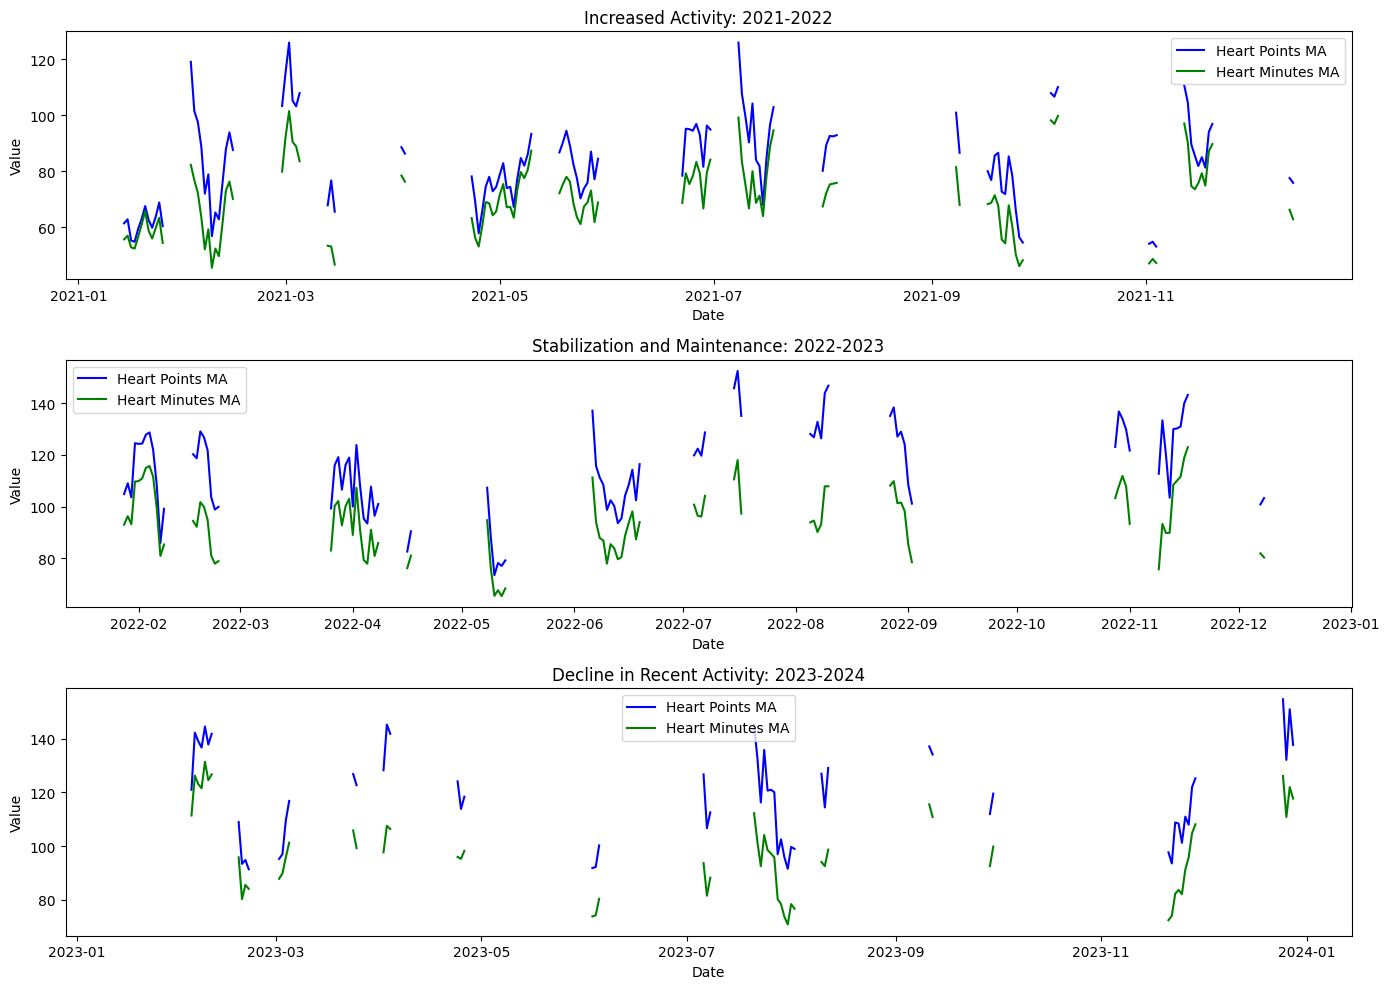

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the dataset, including a 'Date' column
df['Date'] = pd.to_datetime(df.index)

# Define the periods for analysis
early_period = df[(df['Date'] >= '2021-01-01') & (df['Date'] < '2022-01-01')]
middle_period = df[(df['Date'] >= '2022-01-01') & (df['Date'] < '2023-01-01')]
late_period = df[(df['Date'] >= '2023-01-01') & (df['Date'] < '2024-01-01')]

# Calculate Moving Averages for each period
early_period['Heart Points MA'] = early_period['Heart Points'].rolling(window=7).mean()
early_period['Heart Minutes MA'] = early_period['Heart Minutes'].rolling(window=7).mean()

middle_period['Heart Points MA'] = middle_period['Heart Points'].rolling(window=7).mean()
middle_period['Heart Minutes MA'] = middle_period['Heart Minutes'].rolling(window=7).mean()

late_period['Heart Points MA'] = late_period['Heart Points'].rolling(window=7).mean()
late_period['Heart Minutes MA'] = late_period['Heart Minutes'].rolling(window=7).mean()

# Plot the trends for each period
plt.figure(figsize=(14, 10))

# Early Period (Increased Activity)
plt.subplot(3, 1, 1)
plt.plot(early_period['Date'], early_period['Heart Points MA'], label='Heart Points MA', color='blue')
plt.plot(early_period['Date'], early_period['Heart Minutes MA'], label='Heart Minutes MA', color='green')
plt.title('Increased Activity: 2021-2022')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Middle Period (Stabilization and Maintenance)
plt.subplot(3, 1, 2)
plt.plot(middle_period['Date'], middle_period['Heart Points MA'], label='Heart Points MA', color='blue')
plt.plot(middle_period['Date'], middle_period['Heart Minutes MA'], label='Heart Minutes MA', color='green')
plt.title('Stabilization and Maintenance: 2022-2023')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Late Period (Decline in Recent Activity)
plt.subplot(3, 1, 3)
plt.plot(late_period['Date'], late_period['Heart Points MA'], label='Heart Points MA', color='blue')
plt.plot(late_period['Date'], late_period['Heart Minutes MA'], label='Heart Minutes MA', color='green')
plt.title('Decline in Recent Activity: 2023-2024')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


## Seasonality Check: Decomposing Time Series (Heart Points and Heart Metrics)

https://otexts.com/fpp2/stl.html

<Figure size 2000x1000 with 0 Axes>

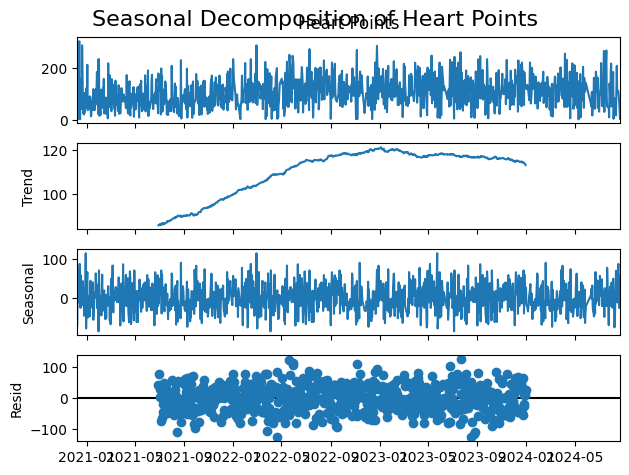

<Figure size 2000x1000 with 0 Axes>

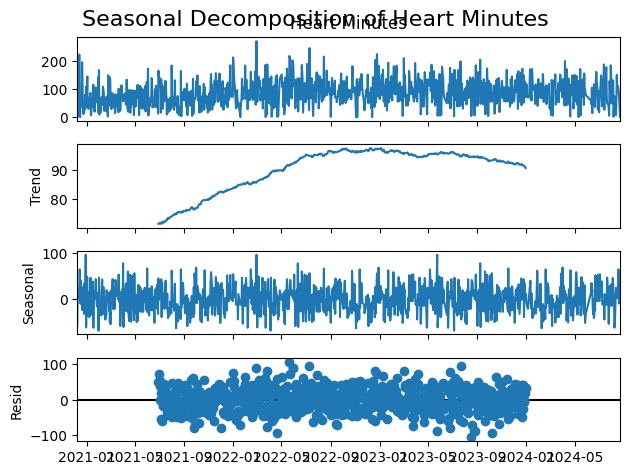

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your DataFrame with the dataset, including a 'Date' column
df['Date'] = pd.to_datetime(df.index)
df.set_index('Date', inplace=True)

# Perform seasonal decomposition for Heart Points
decomposition_heart_points = seasonal_decompose(df['Heart Points'].dropna(), model='additive', period=365)

# Plot the decomposed components for Heart Points
plt.figure(figsize=(20, 10))
decomposition_heart_points.plot()
plt.suptitle('Seasonal Decomposition of Heart Points', fontsize=16)
plt.show()

# Perform seasonal decomposition for Heart Minutes
decomposition_heart_minutes = seasonal_decompose(df['Heart Minutes'].dropna(), model='additive', period=365)

# Plot the decomposed components for Heart Minutes
plt.figure(figsize=(20, 10))
decomposition_heart_minutes.plot()
plt.suptitle('Seasonal Decomposition of Heart Minutes', fontsize=16)
plt.show()
